In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 

In [2]:
play_store=pd.read_csv('/Users/raunakrajpal1310/Downloads/googleplaystore.csv')
user_reviews=pd.read_csv('/Users/raunakrajpal1310/Downloads/googleplaystore_user_reviews.csv')

In [3]:
# Print the Shape of the Two DataFrames

print(f"The shape of PlayStore_df is {play_store.shape}")
print(f"The shape of UserReview_df is {user_reviews.shape}")

The shape of PlayStore_df is (10841, 13)
The shape of UserReview_df is (64295, 5)


In [4]:
# Print the columns of two DataFrames

print(play_store.columns)
print(user_reviews.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [5]:
# Filling the space between the column names with "_" for ease of use in the play_store.

play_store.columns = play_store.columns.str.replace(" ","_")
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [6]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [8]:
def PSinfo():
    temp=pd.DataFrame(index=play_store.columns)
    temp['data_type']=play_store.dtypes
    temp['number of non-null values']=play_store.count()
    temp['NaN values']=play_store.isnull().sum()
    temp['% NaN values']=play_store.isnull().mean().round(4)*100
    temp['unique_count']=play_store.nunique()
    return temp
PSinfo()

,data_type,number of non-null values,NaN values,% NaN values,unique_count
App,object,10841,0,0.00,9660
Category,object,10841,0,0.00,34
Rating,float64,9367,1474,13.60,40
Reviews,object,10841,0,0.00,6002
Size,object,10841,0,0.00,462
Installs,object,10841,0,0.00,22
Type,object,10840,1,0.01,3
Price,object,10841,0,0.00,93
Content_Rating,object,10840,1,0.01,6
Genres,object,10841,0,0.00,120


In [9]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [10]:
user_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [11]:
def URinfo():
    temp = pd.DataFrame(index=user_reviews.columns)
    temp['data_type'] = user_reviews.dtypes
    temp["number of non null values"] = user_reviews.count()
    temp['NaN values'] = user_reviews.isnull().sum()
    temp['% NaN values'] = user_reviews.isnull().mean().round(4)*100 # or user_review.isnull().mean()
    temp['unique_count'] = user_reviews.nunique()
    return temp 
URinfo()

,data_type,number of non null values,NaN values,% NaN values,unique_count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


In [12]:
# We have dropped the rows having all null values as it makes no sense in keeping them
new_UR = user_reviews.dropna(subset=["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"],how="all")

In [13]:
new_UR.shape

(37432, 5)

In [14]:
new_UR.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [15]:
new_UR[new_UR.Translated_Review.isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [16]:
new_UR = new_UR.dropna(subset= ["Translated_Review"],how = "all")
new_UR.shape

(37427, 5)

In [17]:
def New_URinfo():
    temp = pd.DataFrame(index=new_UR.columns)
    temp['data_type'] = new_UR.dtypes
    temp["count of non null values"] = new_UR.count()
    temp['NaN values'] = new_UR.isnull().sum()
    temp['% NaN values'] = new_UR.isnull().sum().round(4)*100 
    temp['unique_count'] = new_UR.nunique()
    return temp 
New_URinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,37427,0,0,865
Translated_Review,object,37427,0,0,27994
Sentiment,object,37427,0,0,3
Sentiment_Polarity,float64,37427,0,0,5410
Sentiment_Subjectivity,float64,37427,0,0,4474


In [18]:
# If any columns have 90% ofthe data missing then we can drop that column.

print(len(play_store)*0.9) # 90% of data will be 9756
play_store.isnull().sum()

9756.9


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [19]:
play_store.dropna(subset=["Rating","Type","Content_Rating","Current_Ver","Android_Ver"],how="all").shape

(10841, 13)

In [20]:
PSinfo()

,data_type,number of non-null values,NaN values,% NaN values,unique_count
App,object,10841,0,0.00,9660
Category,object,10841,0,0.00,34
Rating,float64,9367,1474,13.60,40
Reviews,object,10841,0,0.00,6002
Size,object,10841,0,0.00,462
Installs,object,10841,0,0.00,22
Type,object,10840,1,0.01,3
Price,object,10841,0,0.00,93
Content_Rating,object,10840,1,0.01,6
Genres,object,10841,0,0.00,120


In [21]:
play_store[play_store["Rating"].isnull()].shape

(1474, 13)

In [22]:
# Lets Merge two DataFrame to check the common apps 
ps_copy = play_store.copy()
ur_copy = new_UR.copy()

In [23]:
merged_PS_UR = pd.merge(ps_copy, ur_copy, how='inner', left_on='App', right_on='App')

In [24]:
def Mergedinfo():
    temp = pd.DataFrame(index=merged_PS_UR.columns)
    temp['data_type'] = merged_PS_UR.dtypes
    temp["number of non null values"] = merged_PS_UR.count()
    temp['NaN values'] = merged_PS_UR.isnull().sum()
    temp['% NaN values'] = merged_PS_UR.isnull().mean().round(4)*100 
    temp['unique_count'] = merged_PS_UR.nunique()
    return temp 
Mergedinfo()

,data_type,number of non null values,NaN values,% NaN values,unique_count
App,object,69134,0,0.00,766
Category,object,69134,0,0.00,33
Rating,float64,69095,39,0.06,22
Reviews,object,69134,0,0.00,1005
Size,object,69134,0,0.00,166
Installs,object,69134,0,0.00,12
Type,object,69134,0,0.00,2
Price,object,69134,0,0.00,9
Content_Rating,object,69134,0,0.00,5
Genres,object,69134,0,0.00,65


In [25]:
print(play_store.App.nunique())
print(new_UR.App.nunique())
print(Mergedinfo()["unique_count"]["App"])

9660
865
766


In [26]:
merged_PS_UR[merged_PS_UR.Rating.isnull()] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
45780,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1,2.3 and up,Have used years great success. Easy & fast. Lo...,Positive,0.488889,0.563889
45781,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1,2.3 and up,I like shows blood pressure good level also hi...,Positive,0.286667,0.480000
45782,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1,2.3 and up,Really helps track pressure allows write note ...,Positive,0.100000,0.300000
45783,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1,2.3 and up,The best Blood Pressure Android...... My Docto...,Positive,1.000000,0.650000
45784,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1,2.3 and up,Very helpful many useful features. Particularl...,Positive,0.291667,0.283333
45785,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1,2.3 and up,Doesn't work.,Neutral,0.000000,0.000000
45786,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1,2.3 and up,Just 3 weeks far happy..,Positive,0.450000,1.000000
45787,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1,2.3 and up,Great tracking blood pressure readings. Love e...,Positive,0.650000,0.675000
45788,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1,2.3 and up,Nice UI. Easy enter data.,Positive,0.516667,0.916667
45789,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1,2.3 and up,Easy helpful,Positive,0.433333,0.833333


In [27]:
#encoding for converting the catgorical variables into numeric values 
label_encoder = LabelEncoder()
play_store['Category_Encoded'] = label_encoder.fit_transform(play_store['Category'])
play_store['Type_Encoded'] = label_encoder.fit_transform(play_store['Type'])
play_store['Content_Rating_Encoded'] = label_encoder.fit_transform(play_store['Content_Rating'])

In [28]:
print(play_store[['Category_Encoded','Type_Encoded','Content_Rating_Encoded']])

       Category_Encoded  Type_Encoded  Content_Rating_Encoded
0                     1             1                       1
1                     1             1                       1
2                     1             1                       1
3                     1             1                       4
4                     1             1                       1
...                 ...           ...                     ...
10836                12             1                       1
10837                12             1                       1
10838                21             1                       1
10839                 4             1                       3
10840                19             1                       1

[10841 rows x 3 columns]


In [29]:
# Assuming 'google_play' is the DataFrame containing the 'Installs' column
import re
# Remove rows with 'Free' in the 'Installs' column
play_store = play_store[play_store['Installs'] != 'Free']

# Apply regex to remove special characters from the 'Installs' column
play_store['Installs'] = play_store['Installs'].apply(lambda x: re.sub('[+,]', '', str(x)))

# Convert 'Installs' column to numeric
play_store['Installs'] = pd.to_numeric(play_store['Installs'])


In [30]:
# Convert "Reviews" column to float
play_store["Reviews"] = play_store["Reviews"].astype(float)

# Print the updated DataFrame with the transformed "Reviews" column
print(play_store.dtypes)

play_store['Price'] = play_store['Price'].str.replace('$', '').astype(float)

# Print the updated DataFrame
print(play_store)

App                        object
Category                   object
Rating                    float64
Reviews                   float64
Size                       object
Installs                    int64
Type                       object
Price                      object
Content_Rating             object
Genres                     object
Last_Updated               object
Current_Ver                object
Android_Ver                object
Category_Encoded            int64
Type_Encoded                int64
Content_Rating_Encoded      int64
dtype: object
                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite â€“ FREE Live Cool Themes, Hid...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Numbe

/var/folders/21/b6b1k1q12f1833fcbngfwvqr0000gn/T/ipykernel_12383/491117146.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store['Price'] = play_store['Price'].str.replace('$', '').astype(float)


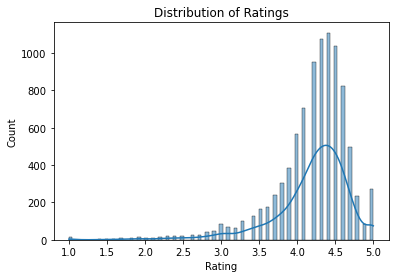

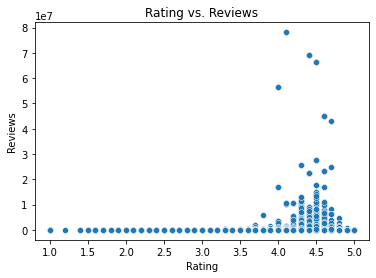

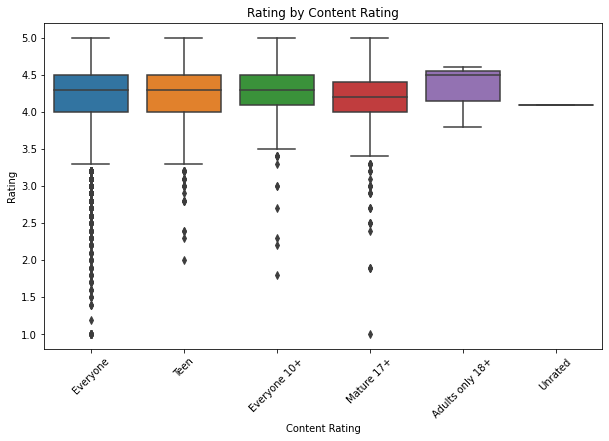

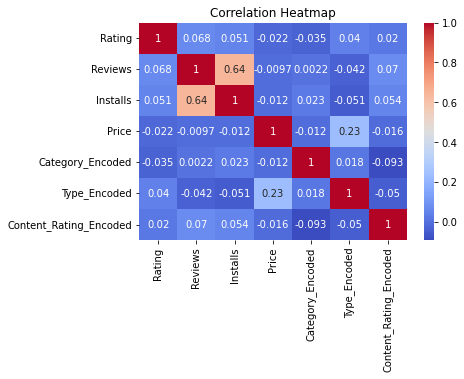

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of Ratings
sns.histplot(data=play_store, x='Rating', kde=True)
plt.title('Distribution of Ratings')
plt.show()

# Scatter plot of Rating vs. Reviews
sns.scatterplot(data=play_store, x='Rating', y='Reviews')
plt.title('Rating vs. Reviews')
plt.show()

# Box plot of Rating by Content Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=play_store, x='Content_Rating', y='Rating')
plt.title('Rating by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


# Create a heatmap using Seaborn
corr_matrix = play_store.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

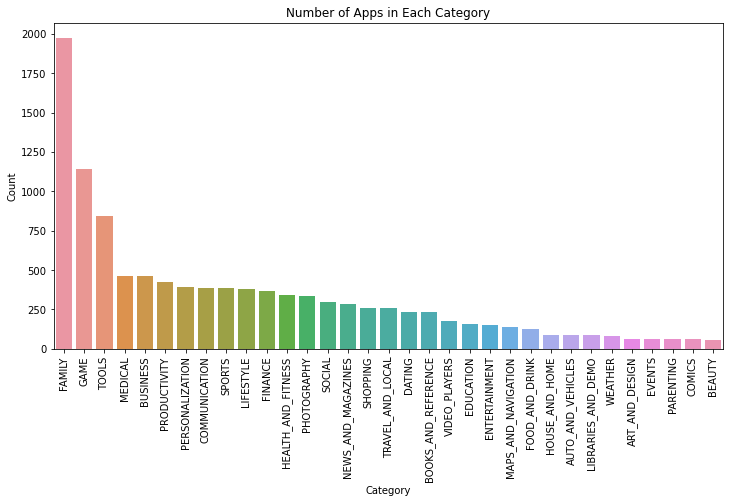

In [32]:
#No of Apps in each categories 

category_counts = play_store['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Apps in Each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

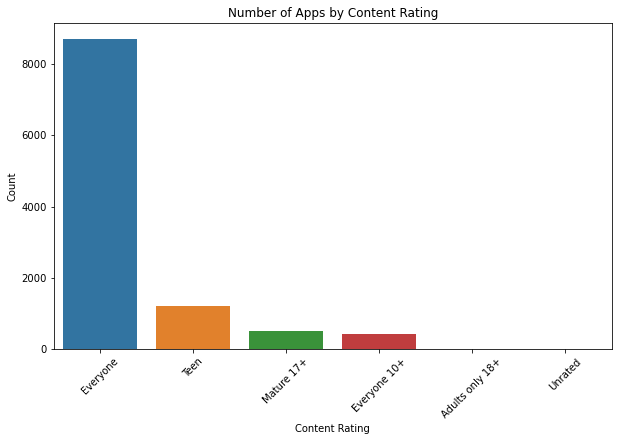

In [33]:
#Which category of apps from content rating column are more found in googleplaystore

content_rating_counts = play_store['Content_Rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=content_rating_counts.index, y=content_rating_counts.values)
plt.title('Number of Apps by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

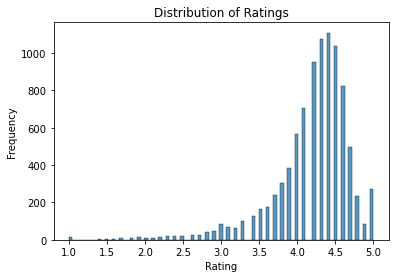

In [34]:
#Distruibution of ratings of apps 
sns.histplot(data=play_store, x='Rating', fill=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

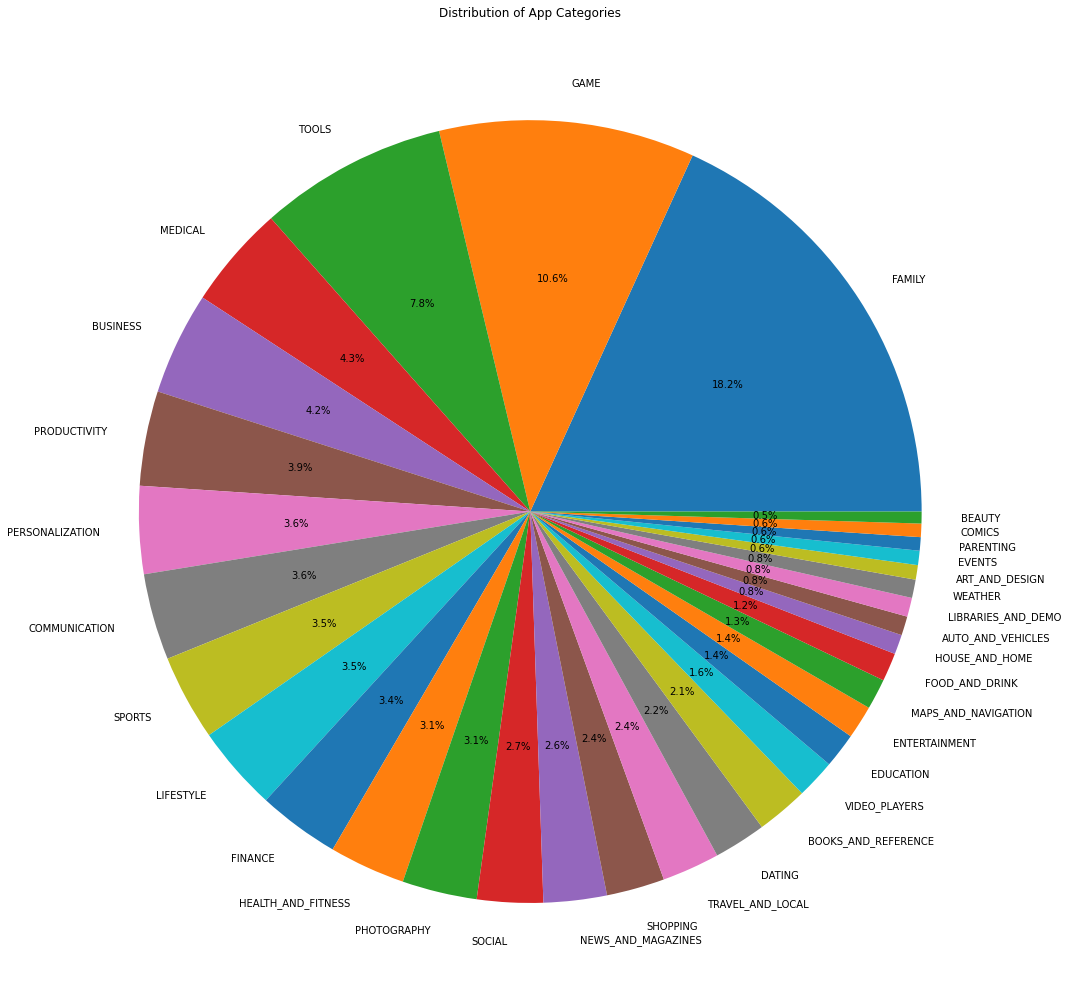

In [35]:
# Count the frequency of each category in the "Category" column
category_counts = play_store["Category"].value_counts()

# Plot a pie chart based on the category counts
plt.figure(figsize=(18,18))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", startangle=0)

# Set plot title
plt.title("Distribution of App Categories")

# Display the plot
plt.show()

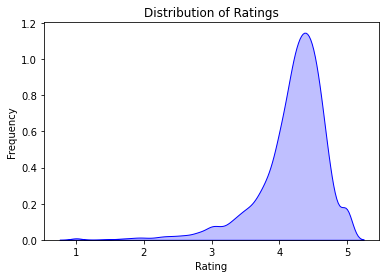

In [36]:
#Distruibution of ratings of apps 
sns.kdeplot(data=play_store, x='Rating', fill=True,color='Blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

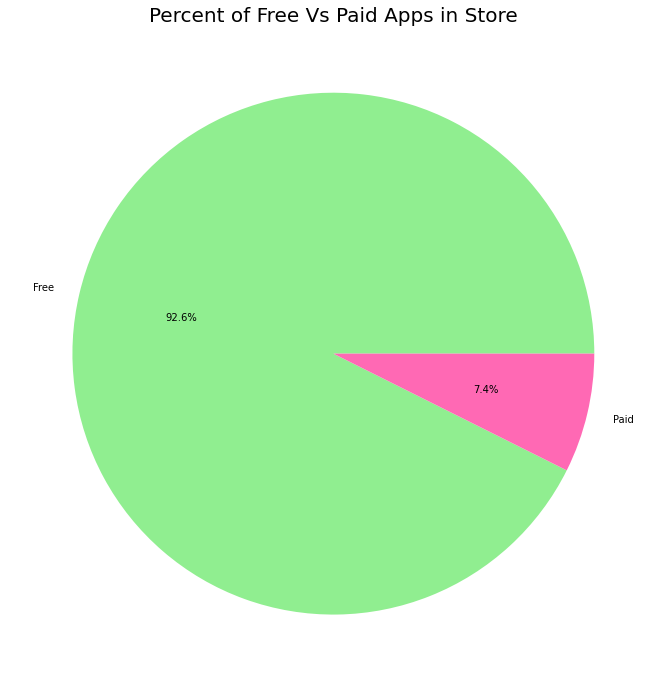

In [37]:
# What portions of apps in playstore are Free and Paid 

# Count the number of free and paid apps
category_counts = play_store['Type'].value_counts()
plt.figure(figsize=(12,12))
# Create the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=["lightgreen","hotpink"])

# Set plot title
plt.title('Percent of Free Vs Paid Apps in Store', size=20)

# Display the plot
plt.show()

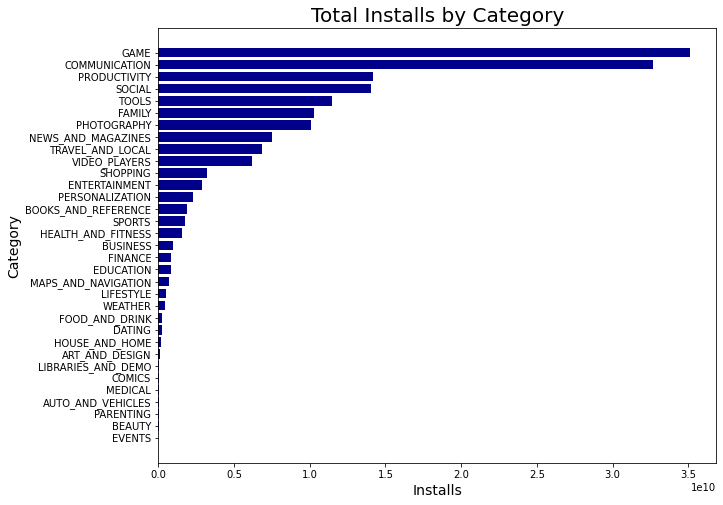

In [38]:
#Which category App's have most number of installs

# Group by category and sum the installs
category_installs = play_store.groupby('Category')['Installs'].sum()

# Sort the categories by installs in descending order
sorted_categories = category_installs.sort_values(ascending=True)

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_categories.index, sorted_categories,color="darkblue")

# Set plot title and labels
plt.title('Total Installs by Category', fontsize=20)
plt.xlabel('Installs', fontsize=14)
plt.ylabel('Category', fontsize=14)

# Display the plot
plt.show()

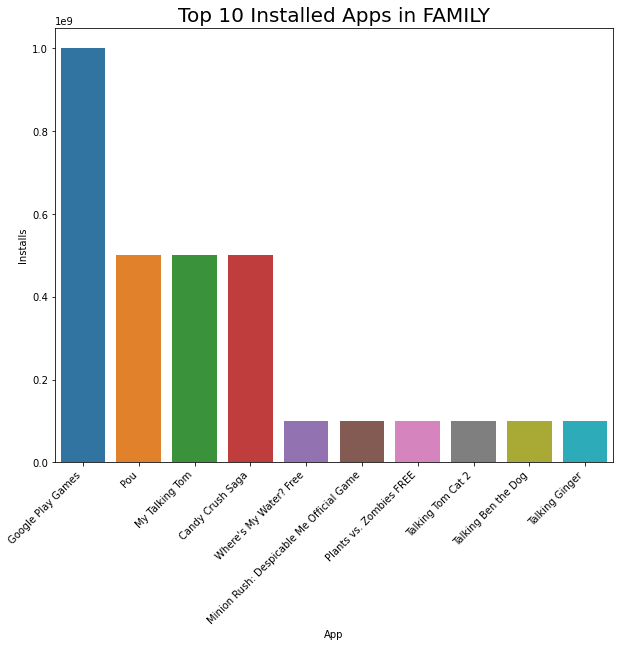

In [39]:
#What are the Top 10 installed apps in any category?

def find_top_10_in_category(category):
    category = category.upper()
    top_10 = play_store[play_store['Category'] == category].sort_values(by='Installs', ascending=False).head(10)

    plt.figure(figsize=(10, 8))
    plt.title('Top 10 Installed Apps in {}'.format(category), size=20)
    graph = sns.barplot(x=top_10['App'], y=top_10['Installs'])
    graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')

find_top_10_in_category('Family')

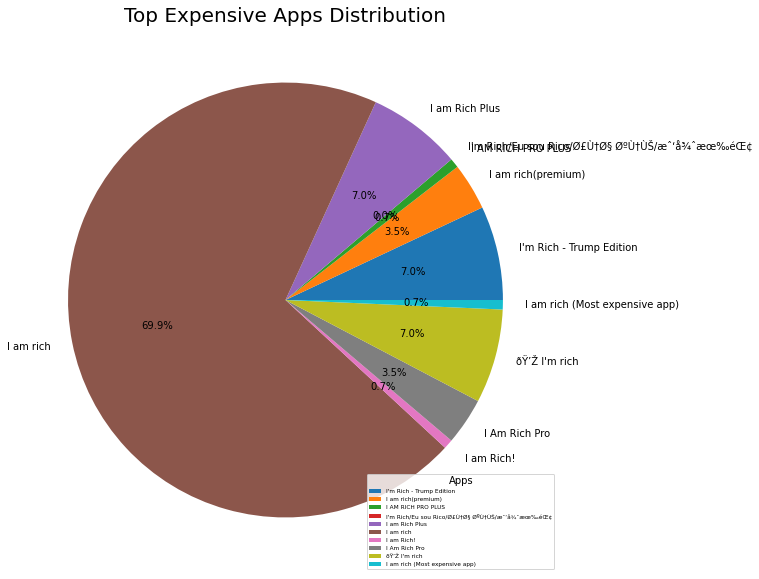

In [40]:
#Which are the top 10 expensive Apps in playstore

top10PaidApps =play_store[play_store['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(10)

plt.figure(figsize=(15, 10))
plt.pie(top10PaidApps.Installs, explode=None, labels=top10PaidApps.App, autopct='%1.1f%%', startangle=0)
plt.title('Top Expensive Apps Distribution', size=20)
plt.legend(top10PaidApps.App, loc="lower right", title="Apps",fontsize="xx-small")

plt.show()


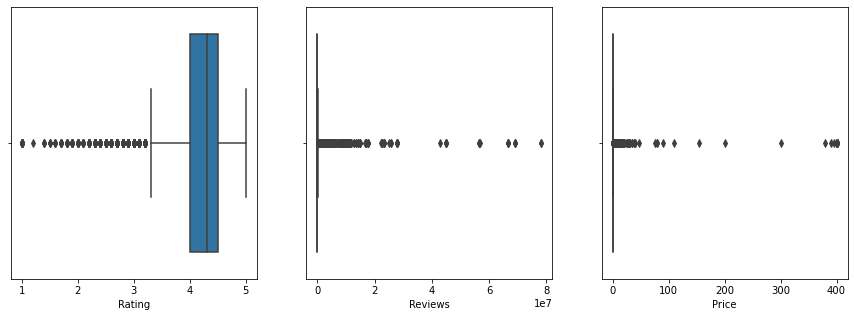

In [41]:
# Let us try to understand and co-relate rating, reviews and price columns together.

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False)
fig.set_size_inches(15, 5)

sns.boxplot(x='Rating', data=play_store, ax=ax1)
sns.boxplot(x='Reviews', data=play_store, ax=ax2)
sns.boxplot(x='Price', data=play_store, ax=ax3)

plt.show()

1.We can see that most of the Ratings are between 4 and around 4.5 and 5.

2.As far as Reviews are concerned, for most of the Apps Reviews are not given.

3.Also for Price, most of the Apps are Free.

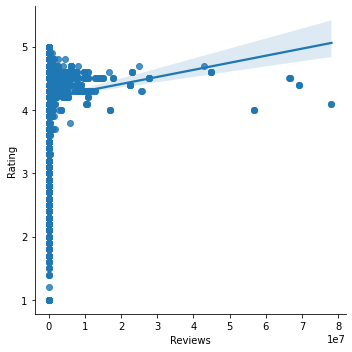

In [42]:
#Well, it would be interesting to see if there is any relationship between Ratings vs Reviews. Does more number of reviews means more ratings?

g = sns.lmplot(x='Reviews', y='Rating', data=play_store)

plt.show()


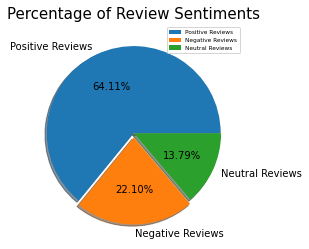

In [43]:
#Percentage of Review Sentiments

counts = user_reviews['Sentiment'].value_counts()
labels = ['Positive Reviews', 'Negative Reviews', 'Neutral Reviews']

plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=15)
plt.axis('off')
plt.legend(fontsize="xx-small")
plt.show()

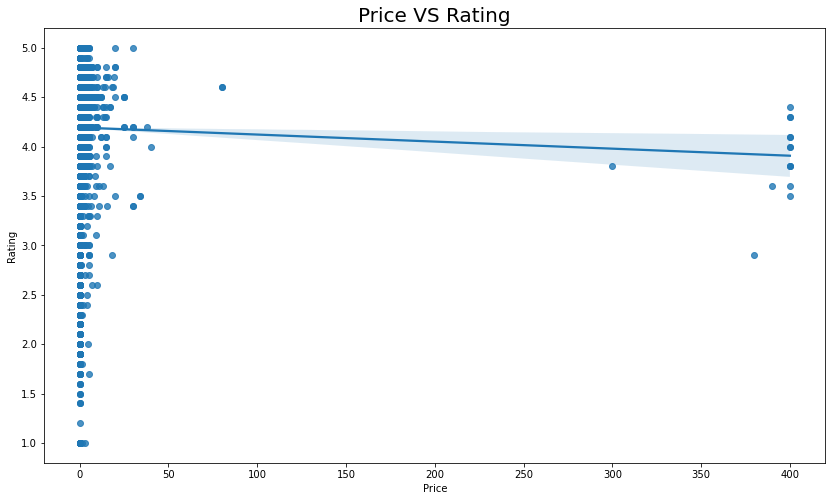

In [44]:
#does price effects the ratings 

plt.figure(figsize=(14, 8))
sns.regplot(x="Price", y="Rating", data=play_store)
plt.title("Price VS Rating", size=20)
plt.show()

Yes, as the price increases ratings received seems to decrease even below the average rating in the googleplaystore.

In [45]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the 'Installs' feature
play_store['Installs'] = scaler.fit_transform(play_store[['Installs']])

# Print the standardized data
print(play_store.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite â€“ FREE Live Cool Themes, Hid...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size  Installs  Type  Price Content_Rating  \
0     159.0   19M -0.181761  Free    0.0       Everyone   
1     967.0   14M -0.175998  Free    0.0       Everyone   
2   87510.0  8.7M -0.123073  Free    0.0       Everyone   
3  215644.0   25M  0.406180  Free    0.0           Teen   
4     967.0  2.8M -0.180703  Free    0.0       Everyone   

                      Genres      Last_Updated         Current_Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [46]:
columns_to_standardize = ['Price','Reviews', 'Type_Encoded', 'Installs', 'Rating', 'Category_Encoded', 'Content_Rating_Encoded']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the selected columns
play_store[columns_to_standardize] = scaler.fit_transform(play_store[columns_to_standardize])


# Print the updated DataFrame
print(play_store)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite â€“ FREE Live Cool Themes, Hid...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

         Rating   Reviews  

In [47]:
#chi square test 

import pandas as pd
import scipy.stats as stats

# Features: ['Price','Reviews', 'Type_Encoded', 'Installs', 'Rating', 'Category_Encoded', 'Content_Rating_Encoded']
features = ['Price', 'Reviews', 'Type_Encoded', 'Installs', 'Rating', 'Category_Encoded', 'Content_Rating_Encoded']

# DataFrame: play_store
# Assuming you have the 'play_store' DataFrame with the relevant data

# Create the contingency table
contingency_table = pd.crosstab(play_store['Type_Encoded'], play_store['Content_Rating_Encoded'])

# Perform the chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("There is a significant association between the features.")
else:
    print("There is no significant association between the features.")


There is a significant association between the features.


In [48]:
import pandas as pd
import scipy.stats as stats

# Features: ['Price','Reviews', 'Type_Encoded', 'Installs', 'Rating', 'Category_Encoded', 'Content_Rating_Encoded']
features = ['Price', 'Reviews', 'Type_Encoded', 'Installs', 'Rating', 'Category_Encoded', 'Content_Rating_Encoded']

# DataFrame: play_store
# Assuming you have the 'play_store' DataFrame with the relevant data

# Create an empty dataframe to store the results
results = pd.DataFrame(index=features, columns=features)

# Perform pairwise chi-square tests
for feature1 in features:
    for feature2 in features:
        # Skip if comparing the same feature
        if feature1 == feature2:
            results.loc[feature1, feature2] = '-'
            continue
        
        # Create the contingency table
        contingency_table = pd.crosstab(play_store[feature1], play_store[feature2])
        
        # Perform the chi-square test
        chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
        
        # Set the significance level
        alpha = 0.05
        
        # Interpret the results
        if p_value < alpha:
            results.loc[feature1, feature2] = 'Dependent'
        else:
            results.loc[feature1, feature2] = 'Independent'

# Display the results
print(results)


                              Price      Reviews Type_Encoded   Installs  \
Price                             -  Independent    Dependent  Dependent   
Reviews                 Independent            -  Independent  Dependent   
Type_Encoded              Dependent  Independent            -  Dependent   
Installs                  Dependent    Dependent    Dependent          -   
Rating                    Dependent  Independent    Dependent  Dependent   
Category_Encoded          Dependent    Dependent    Dependent  Dependent   
Content_Rating_Encoded  Independent    Dependent    Dependent  Dependent   

                             Rating Category_Encoded Content_Rating_Encoded  
Price                     Dependent        Dependent            Independent  
Reviews                 Independent        Dependent              Dependent  
Type_Encoded              Dependent        Dependent              Dependent  
Installs                  Dependent        Dependent              Dependent  
R

In [49]:
play_store['Rating'].isnull().sum()
play_store.dropna(subset=['Rating'], inplace=True)

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Data splitting into training and testing data
X_data = play_store[['Price', 'Reviews', 'Type_Encoded', 'Category_Encoded', 'Content_Rating_Encoded']]

# Extract the target variable columns from your dataset
y_installs_data = play_store['Installs']
y_rating_data = play_store['Rating']

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Perform k-fold cross-validation
k =30 # Number of folds
rmse_installs_scores = np.sqrt(-cross_val_score(pipeline, X_data, y_installs_data, scoring='neg_mean_squared_error', cv=k))
rmse_rating_scores = np.sqrt(-cross_val_score(pipeline, X_data, y_rating_data, scoring='neg_mean_squared_error', cv=k))

# Print the RMSE scores for Installs
print("RMSE scores for Installs:")
for i, score in enumerate(rmse_installs_scores):
    print(f"Fold {i+1}: {score}")

# Print the RMSE scores for Rating
print("RMSE scores for Rating:")
for i, score in enumerate(rmse_rating_scores):
    print(f"Fold {i+1}: {score}")

# Calculate the average RMSE scores
avg_rmse_installs = np.mean(rmse_installs_scores)
avg_rmse_rating = np.mean(rmse_rating_scores)

print("\nAverage RMSE for Installs:", avg_rmse_installs)
print("Average RMSE for Rating:", avg_rmse_rating)

RMSE scores for Installs:
Fold 1: 0.6542871698574588
Fold 2: 1.9359210909815747
Fold 3: 0.5884277586498464
Fold 4: 0.1340924038694616
Fold 5: 0.09669374973785098
Fold 6: 1.4182690851197977
Fold 7: 0.2110609922367688
Fold 8: 0.8401671940238181
Fold 9: 0.9380986229946424
Fold 10: 1.4079193133731172
Fold 11: 1.4563254959684528
Fold 12: 1.582244423983983
Fold 13: 1.9686134025873143
Fold 14: 0.6695654851477765
Fold 15: 0.28104825105208314
Fold 16: 0.1303407846881541
Fold 17: 0.6298226868237176
Fold 18: 0.5845994563276359
Fold 19: 0.11953530922567591
Fold 20: 0.1579849125212116
Fold 21: 0.10713192115828848
Fold 22: 0.12433638745024074
Fold 23: 0.12828815746953198
Fold 24: 0.13620853159630716
Fold 25: 0.15102749021397047
Fold 26: 0.18845193318032122
Fold 27: 0.10156969217440999
Fold 28: 0.6557829304932967
Fold 29: 0.13835097080801417
Fold 30: 0.13431186417168248
RMSE scores for Rating:
Fold 1: 0.679810720030226
Fold 2: 1.0202067715398453
Fold 3: 0.6944437195386117
Fold 4: 0.7130063765381403
F

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

# Data splitting into training and testing data
X_data = play_store[['Price', 'Reviews', 'Type_Encoded', 'Category_Encoded', 'Content_Rating_Encoded']]

# Extract the target variable columns from your dataset
y_installs_data = play_store['Installs']
y_rating_data = play_store['Rating']

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor())
])

# Perform k-fold cross-validation
k = 50 
rmse_installs_scores = np.sqrt(-cross_val_score(pipeline, X_data, y_installs_data, scoring='neg_mean_squared_error', cv=k))
rmse_rating_scores = np.sqrt(-cross_val_score(pipeline, X_data, y_rating_data, scoring='neg_mean_squared_error', cv=k))

# Print the RMSE scores for Installs
print("RMSE scores for Installs:")
for i, score in enumerate(rmse_installs_scores):
    print(f"Fold {i+1}: {score}")

# Print the RMSE scores for Rating
print("RMSE scores for Rating:")
for i, score in enumerate(rmse_rating_scores):
    print(f"Fold {i+1}: {score}")

# Calculate the average RMSE scores
avg_rmse_installs = np.mean(rmse_installs_scores)
avg_rmse_rating = np.mean(rmse_rating_scores)

print("\nAverage RMSE for Installs:", avg_rmse_installs)
print("Average RMSE for Rating:", avg_rmse_rating)

RMSE scores for Installs:
Fold 1: 0.8566963639542924
Fold 2: 0.10055480752877438
Fold 3: 0.09007147491886211
Fold 4: 0.02460598583537205
Fold 5: 0.1529612580607805
Fold 6: 0.16841400723413225
Fold 7: 0.0987469282857262
Fold 8: 0.047727518157645976
Fold 9: 0.35871269318113896
Fold 10: 0.19025273459101427
Fold 11: 0.08636155677708487
Fold 12: 0.022487718557956813
Fold 13: 0.01595525759571672
Fold 14: 0.4083018682646552
Fold 15: 0.1879316888449021
Fold 16: 0.14175176269879142
Fold 17: 0.8282690821967021
Fold 18: 0.8033678626661359
Fold 19: 0.9061418877952844
Fold 20: 1.4014985890418061
Fold 21: 0.8679387251695632
Fold 22: 0.3905325768376117
Fold 23: 0.0825926919563892
Fold 24: 0.8650595508601872
Fold 25: 0.13653050360884883
Fold 26: 0.11185651865479067
Fold 27: 0.09300427617321752
Fold 28: 0.36785729036386994
Fold 29: 0.5624221517262954
Fold 30: 0.7788786394072104
Fold 31: 0.10938290539715019
Fold 32: 0.09887073881667088
Fold 33: 0.09067055583421937
Fold 34: 0.08651120557397723
Fold 35: 0

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor 

# Data splitting into training and testing data
X_data = play_store[['Price', 'Reviews', 'Type_Encoded', 'Category_Encoded', 'Content_Rating_Encoded']]

# Extract the target variable columns from your dataset
y_installs_data = play_store['Installs']
y_rating_data = play_store['Rating']

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

# Perform k-fold cross-validation
k = 25 # Number of folds
rmse_installs_scores = np.sqrt(-cross_val_score(pipeline, X_data, y_installs_data, scoring='neg_mean_squared_error', cv=k))
rmse_rating_scores = np.sqrt(-cross_val_score(pipeline, X_data, y_rating_data, scoring='neg_mean_squared_error', cv=k))

# Print the RMSE scores for Installs
print("RMSE scores for Installs:")
for i, score in enumerate(rmse_installs_scores):
    print(f"Fold {i+1}: {score}")

# Print the RMSE scores for Rating
print("RMSE scores for Rating:")
for i, score in enumerate(rmse_rating_scores):
    print(f"Fold {i+1}: {score}")

# Calculate the average RMSE scores
avg_rmse_installs = np.mean(rmse_installs_scores)
avg_rmse_rating = np.mean(rmse_rating_scores)

print("\nAverage RMSE for Installs:", avg_rmse_installs)
print("Average RMSE for Rating:", avg_rmse_rating)

RMSE scores for Installs:
Fold 1: 0.6305821526381866
Fold 2: 0.2938247065855624
Fold 3: 0.2417073018999511
Fold 4: 0.09134376026367898
Fold 5: 0.6542804493228589
Fold 6: 0.09330078096564806
Fold 7: 0.4059044721063552
Fold 8: 0.4036444985831796
Fold 9: 0.613182623601974
Fold 10: 0.9995590743628326
Fold 11: 0.6151393560184902
Fold 12: 0.507622814637159
Fold 13: 0.27366306175162464
Fold 14: 0.20830928692492587
Fold 15: 0.6450930345976513
Fold 16: 0.18353132465908387
Fold 17: 0.06834655016502994
Fold 18: 0.49322771437146207
Fold 19: 0.11186617220056971
Fold 20: 0.3355975858081248
Fold 21: 0.5189860019873528
Fold 22: 0.15490330041633857
Fold 23: 0.13953286240916327
Fold 24: 0.14519739634611056
Fold 25: 0.050463433822815214
RMSE scores for Rating:
Fold 1: 0.7555779277882795
Fold 2: 1.0000921953611868
Fold 3: 0.6784465401450054
Fold 4: 0.7793527403723687
Fold 5: 0.5385545160747662
Fold 6: 0.6650219590660574
Fold 7: 0.9912115614658119
Fold 8: 0.5441409669213041
Fold 9: 0.591403110450315
Fold 1

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor 

# Data splitting into training and testing data
X_data = play_store[['Price', 'Reviews', 'Type_Encoded', 'Category_Encoded', 'Content_Rating_Encoded']]

# Extract the target variable columns from your dataset
y_installs_data = play_store['Installs']
y_rating_data = play_store['Rating']

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

# Perform k-fold cross-validation
k = 50 # Number of folds
rmse_installs_scores = np.sqrt(-cross_val_score(pipeline, X_data, y_installs_data, scoring='neg_mean_squared_error', cv=k))
rmse_rating_scores = np.sqrt(-cross_val_score(pipeline, X_data, y_rating_data, scoring='neg_mean_squared_error', cv=k))

# Print the RMSE scores for Installs
print("RMSE scores for Installs:")
for i, score in enumerate(rmse_installs_scores):
    print(f"Fold {i+1}: {score}")

# Print the RMSE scores for Rating
print("RMSE scores for Rating:")
for i, score in enumerate(rmse_rating_scores):
    print(f"Fold {i+1}: {score}")

# Calculate the average RMSE scores
avg_rmse_installs = np.mean(rmse_installs_scores)
avg_rmse_rating = np.mean(rmse_rating_scores)

print("\nAverage RMSE for Installs:", avg_rmse_installs)
print("Average RMSE for Rating:", avg_rmse_rating)

RMSE scores for Installs:
Fold 1: 0.8314850261349791
Fold 2: 0.37132868967930954
Fold 3: 0.39601216376079973
Fold 4: 0.018904346367850492
Fold 5: 0.30540221620413605
Fold 6: 0.113199019565139
Fold 7: 0.0813810012477664
Fold 8: 0.05275229384488886
Fold 9: 0.44920358997536924
Fold 10: 0.23415342252389768
Fold 11: 0.09178477625278272
Fold 12: 0.02949289285455155
Fold 13: 0.29838436071841584
Fold 14: 0.43233532533636004
Fold 15: 0.4551893862472942
Fold 16: 0.25479270245020785
Fold 17: 0.6623813556089049
Fold 18: 0.49698232052910213
Fold 19: 1.006328752489627
Fold 20: 0.8573951988932237
Fold 21: 0.7470405324563281
Fold 22: 0.5291131730898601
Fold 23: 0.1514233421734106
Fold 24: 0.6983213509999919
Fold 25: 0.18997010111204898
Fold 26: 0.1922770665669429
Fold 27: 0.07120940406964053
Fold 28: 0.3204056423936995
Fold 29: 0.5365915814101224
Fold 30: 0.7141653694484641
Fold 31: 0.07383847002385253
Fold 32: 0.29358445714682346
Fold 33: 0.09044103909566512
Fold 34: 0.04542053180956441
Fold 35: 0.06